# Deep Learning HW 1 
Improve the following Fashion MNIST DNN model performance: https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print(tf.__version__)

2.13.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4991 - accuracy: 0.8254
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8643
Epoch 3/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3394 - accuracy: 0.8762
Epoch 4/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3157 - accuracy: 0.8839
Epoch 5/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2951 - accuracy: 0.8915
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2821 - accuracy: 0.8954
Epoch 7/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2683 - accuracy: 0.9017
Epoch 8/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2581 - accuracy: 0.9045
Epoch 9/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/200
1875/1875 [==============================] - 9s 5ms/step - l

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 1.2719 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


In [17]:
y = model.predict(test_images)
y1 = []
for i in range(len(y)):
    y1.append(np.argmax(y[i]))

313/313 [==============================] - 1s 1ms/step


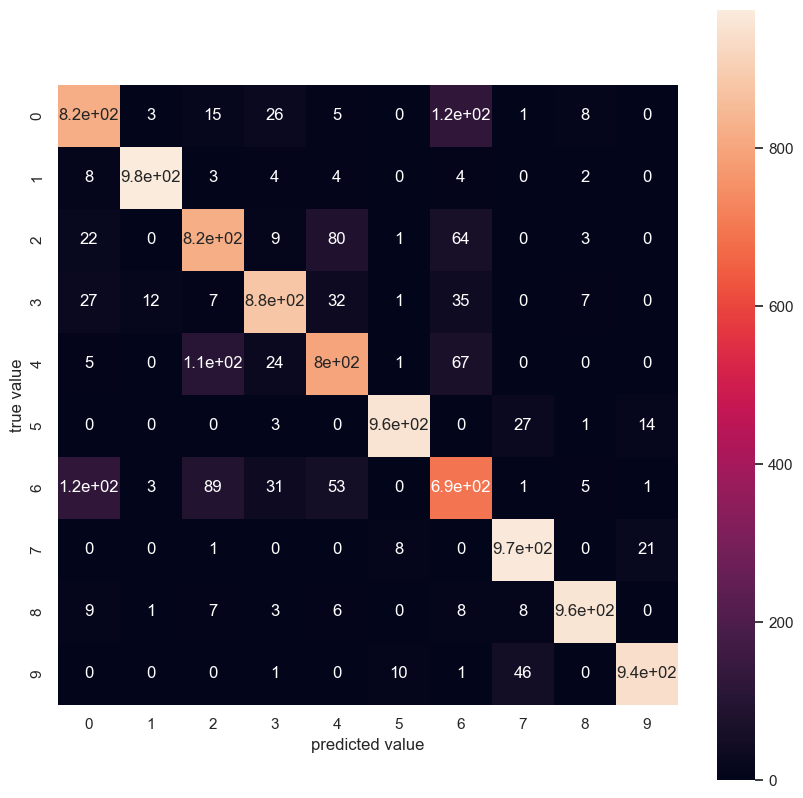

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) 
sns.heatmap(confusion_matrix(test_labels,y1), square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');